**실습.1**
### **iris 데이터를 이용한 <span style="color:darkgreen">AI분류</span> 문제**
---


#### 붓꽃의 종류, 길이, 너비 등의 데이터를 이용하여 붓꽃(iris)의 종류를 분류하는 AI 모델 제작 문제입니다. 
#### AI코딩 단계에 따라 주어지는 문제를 읽고 답안을 작성하세요.
 - 데이터 : 분류(카테고리)
 - 모델 : RandomForest, DeepLerning
 - 주요 전처리 : 분석 Column 추가, label 전처리(카테고리 → 수치화)
 - 주요 학습 내용 : 산점도, 히스토그램, 분류형 모델 생성(분류방법, input, output 처리, 손실함수 등)
---


**iris.csv / iris(붓꽃) 데이터 컬럼 설명**
- sepal.length : 큰 꽃잎의 길이
- sepal.width : 큰 꽃잎의 너비
- petal.length : 작은 꽃잎의 길이
- petal.width : 작은 꽃잎의 너비
- variety : 클래스, target, label
    * Setosa, Versicolor, Virginica

---
> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행해주시기 바랍니다.**<br>
> - AIDU 사용을 위한 AIDU 환경변수를 선언을 하는 코드. <span style="color:darkgreen"></span><br>

---

In [1]:
# AIDU 내부 연동을 위한 라이브러리
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm
# AIDU와 연동을 위한 변수
aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)


### **Q1. Pandas를 pd로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [2]:
import pandas as pd

### **Q2.Matplotlib의 pyplot을 plt로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [3]:
import matplotlib.pyplot as plt

### **Q3.iris.csv를 판다스 데이터 프레임으로 불러와서 iris에 선언하는 코드를 작성하고 실행하시기 바랍니다.**
---

In [4]:
iris = pd.read_csv(aidu_framework.config.data_dir + '/iris.csv')

### **Q4. 데이터 프레임 iris의 처음 6개 행을 조회하는 코드를 작성하고 실행하시기 바랍니다.**
---

In [5]:
iris.head(6)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa


### **Q5. 데이터 프레임 iris의 variety 컬럼을 바 플롯(bar plot)을 이용하여 시각화 하시기 바랍니다.**

<BarContainer object of 3 artists>

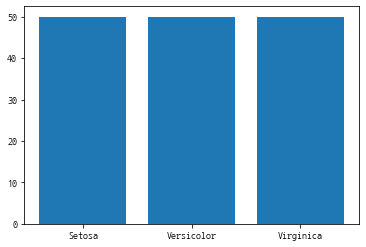

In [6]:
col = ['Setosa', 'Versicolor', 'Virginica']
plt.bar(col, iris['variety'].value_counts())

### **Q6. 데이터 프레임 iris의 sepal.length 컬럼을 히스토 그램을 이용하여 시각화 하시기 바랍니다.**
---

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

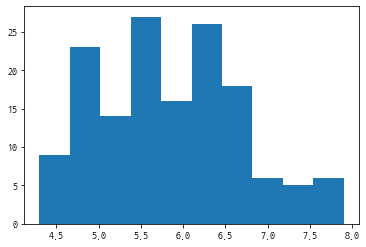

In [7]:
plt.hist(iris['sepal.length'])

### **Q7. 데이터 프레임 iris의 petal.width 컬럼을 히스토 그램을 이용하여 시각화 하시기 바랍니다.**

* **
- 다섯개 구간으로 나누어 시각화 하시오.
---

(array([49.,  8., 41., 29., 23.]),
 array([0.1 , 0.58, 1.06, 1.54, 2.02, 2.5 ]),
 <a list of 5 Patch objects>)

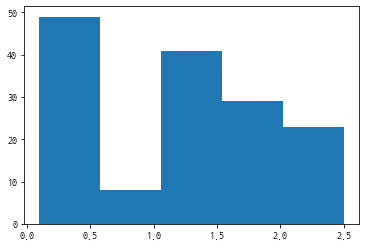

In [8]:
plt.hist(iris['petal.width'], bins=5)

### **Q8. 데이터 프레임 iris의 sepal.width를 x축으로 petal.width를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**
---

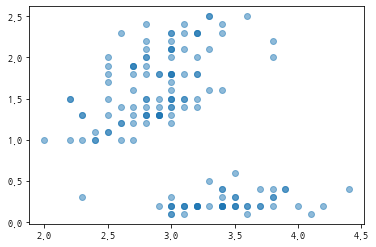

In [9]:
plt.scatter(iris['sepal.width'], iris['petal.width'], alpha=0.5)

### **Q9. 데이터 프레임 iris의 sepal.length를 x축으로 petal.length를 y축으로 하는 산점도를 시각화 하시기 바랍니다.**

* **
- class에 따라 다른색을 띄도록 시각화 하시오.
---

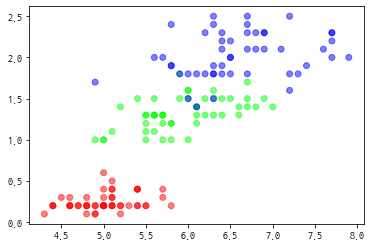

In [10]:
import numpy as np

color=['' for i in range(len(iris))]

for i in range(len(iris)):
    if iris['variety'][i] == 'Setosa':
        color[i] = '#FF0000'
    elif iris['variety'][i] == 'Versicolor':
        color[i] = '#00FF00'
    elif iris['variety'][i] == 'Virginica':
        color[i] = '#0000FF'

plt.scatter(iris['sepal.length'], iris['petal.width'], color=color, alpha=0.5)


### **Q10. 다음 조건에 맞추어 데이터 프레임 iris에 새로운 컬럼 sepal_ratio 를 추가하시기 바랍니다.**
* **
- sepal.length를 분자로 sepal.width를 분모로 하는 비율을 sepal_ratio로 정의한다.
---

In [12]:
iris['sepal_ratio'] = iris['sepal.length']/iris['sepal.width']

### **Q11. 다음 조건에 맞추어 데이터 프레임 iris에 새로운 컬럼 length_diff 를 추가하시기 바랍니다.**

* **
- sepal.length와 petal.length의 차이의 크기를 length_diff로 정의한다.
---

In [24]:
iris['length_diff'] = abs(iris['sepal.length'] - iris['petal.length'])

### **Q12. 데이터 프레임 iris의 컬럼 variety를 label encoding하시기 바랍니다.**
---

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['variety'] = le.fit_transform(iris['variety'])

In [34]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal_ratio,length_diff
0,5.1,3.5,1.4,0.2,0,1.457143,3.7
1,4.9,3.0,1.4,0.2,0,1.633333,3.5
2,4.7,3.2,1.3,0.2,0,1.468750,3.4
3,4.6,3.1,1.5,0.2,0,1.483871,3.1
4,5.0,3.6,1.4,0.2,0,1.388889,3.6
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.233333,1.5
146,6.3,2.5,5.0,1.9,2,2.520000,1.3
147,6.5,3.0,5.2,2.0,2,2.166667,1.3
148,6.2,3.4,5.4,2.3,2,1.823529,0.8


### **Q13. 데이터를 트레이닝셋 / 테스트셋으로 분할하시기 바랍니다.**
* **
- y는 iris데이터 프레임의 'variety'컬럼이고 x는 그 나머지 컬럼이다.
- train : test = 9 : 1
- y의 클래스가 골고루 분할되도록 stratify하게 분할한다.
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_test, y_test
- random state, seed 등은 2021로 설정한다.
---

In [47]:
from sklearn.model_selection import train_test_split

X = iris.drop(columns=['variety']).values
y = iris['variety'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2021)

### **Q15. Random Forest 모델들을 학습시키시기 바랍니다.**
* **
- RandomForestClassifier 하이퍼파라미터 설정 :  n_estimators=50, max_depth=13, random_state=30, min_samples_leaf=5
- n_estimators 종합한 전체 트리의 가지수, max_depth : 각 Tree의 가장 깊은 높이, min_samples_leaf: 각 끝의 노드에는 최소 5개의 트레이닝 샘플이 있어야함
- 트레이닝 셋 (x_train, y_train)을 이용하여 학습시킨다.
- Forest를 이루는 tree의 leaf안에는 최소한 5개의 트레이닝셋 샘플이 있어야 한다.
- seed나 random_state는 2021로 고정한다.
---

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, max_depth=13, random_state=30, min_samples_leaf=5)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=5, n_estimators=50,
                       random_state=30)

> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
>

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

### **Q16. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다.**
* **
- Tensorflow framework를 사용한다.
- 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
    * 2개의 fully connected layer를 사용할 것
    * Batchnormalization을 반드시 활용한다.
- Early stopping을 이용하여, validation loss가 5번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
- 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
- y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.(해당 형태의 경우 loss function은 sparse_categorical_crossentropy를 활용해야한다.)
- epochs는 2000번을 지정한다.
---

In [56]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True)
# mc = ModelCheckpoint('my_checkpoint.ckpt', monitor='val_loss', save_best_only=True, verbose=1)
# history = model.fit(x_train, y_train, epochs=2000, callbacks=[es, mc], validation_data=(x_test, y_test), verbose=1)
history = model.fit(x_train, y_train, epochs=2000, callbacks=[es], validation_data=(x_test, y_test), verbose=1)

Epoch 1/2000
5/5 [==============================] - 0s 42ms/step - loss: 2.5730 - accuracy: 0.1259 - val_loss: 1.4359 - val_accuracy: 0.3333
Epoch 2/2000
5/5 [==============================] - 0s 8ms/step - loss: 1.6671 - accuracy: 0.2222 - val_loss: 1.2795 - val_accuracy: 0.3333
Epoch 3/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.9475 - accuracy: 0.5259 - val_loss: 1.1666 - val_accuracy: 0.3333
Epoch 4/2000
5/5 [==============================] - 0s 7ms/step - loss: 0.6701 - accuracy: 0.6741 - val_loss: 1.0840 - val_accuracy: 0.3333
Epoch 5/2000
5/5 [==============================] - 0s 14ms/step - loss: 0.4840 - accuracy: 0.7926 - val_loss: 1.0220 - val_accuracy: 0.6667
Epoch 6/2000
5/5 [==============================] - 0s 14ms/step - loss: 0.3869 - accuracy: 0.8815 - val_loss: 0.9730 - val_accuracy: 0.6667
Epoch 7/2000
5/5 [==============================] - 0s 9ms/step - loss: 0.3103 - accuracy: 0.9111 - val_loss: 0.9381 - val_accuracy: 0.6667
Epoch 8/2000
5/5

### **Q17. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시기 바랍니다.**
* **
- 필요한 라이브러리가 있다면 따로 불러온다.
- epochs에 따른 accuracy의 변화를 시각화 한다.
- train accuracy와 validation accuracy를 전부 시각화하고, 구별가능해야 한다.
- 그래프의 타이틀은 'Accuracy'로 표시한다.
- x축에는 'epochs'라고 표시하고 y축에는 'accuracy'라고 표시한다.
---

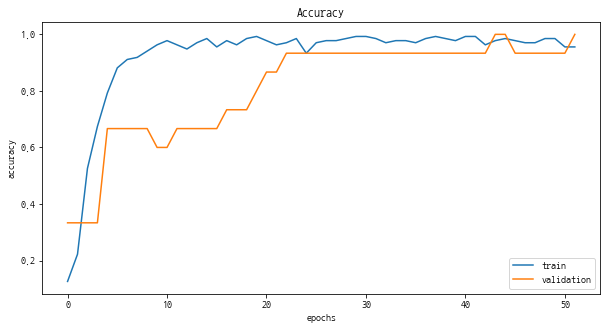

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='lower right')